# 26 · Contornos básicos y propiedades geométricas

Imports y ruta de imagen.

In [31]:
import cv2, numpy as np, matplotlib.pyplot as plt, pandas as pd

IMG_PATH = r"C:\\Users\\20808\\Documents\\Repositorios\\Vision_en_Robotica\\imagenes\\monedas.jpg"


Carga y visualización.

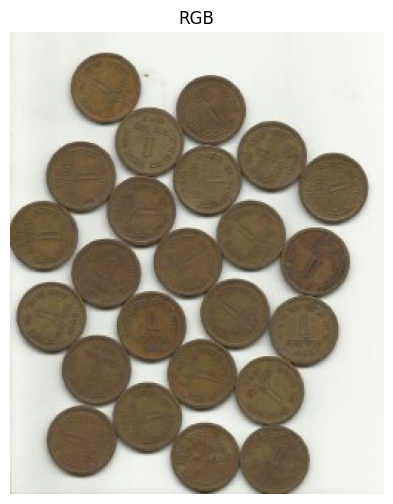

In [32]:
bgr = cv2.imread(IMG_PATH, cv2.IMREAD_COLOR)
if bgr is None:
    raise FileNotFoundError(f"No se pudo cargar: {IMG_PATH}")
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6,6)); plt.imshow(rgb); plt.title("RGB"); plt.axis("off"); plt.show()

Conversión a gris, suavizado y umbralización (Otsu) con polaridad automática según brillo medio.

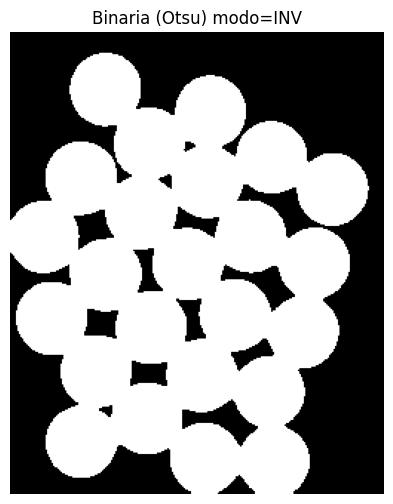

In [33]:
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (5,5), 0)
use_inverse = gray_blur.mean() > 127
mode = cv2.THRESH_BINARY_INV if use_inverse else cv2.THRESH_BINARY
_, bin_img = cv2.threshold(gray_blur, 0, 255, mode + cv2.THRESH_OTSU)

plt.figure(figsize=(6,6)); plt.imshow(bin_img, cmap="gray"); plt.title(f"Binaria (Otsu) modo={'INV' if use_inverse else 'BIN'}"); plt.axis("off"); plt.show()

Detección de contornos externos (`RETR_EXTERNAL`, `CHAIN_APPROX_SIMPLE`).

Contornos detectados (externos): 1


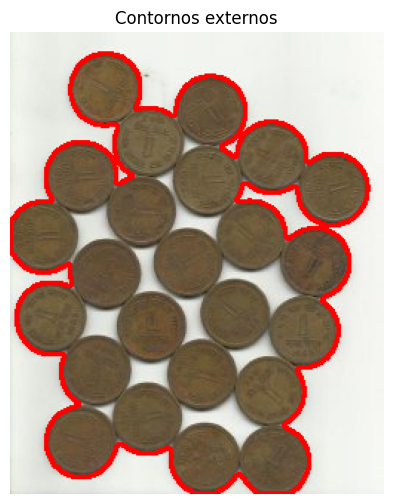

In [34]:
contours, hierarchy = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"Contornos detectados (externos): {len(contours)}")

vis = rgb.copy()
cv2.drawContours(vis, contours, -1, (255,0,0), 2)
plt.figure(figsize=(6,6)); plt.imshow(vis); plt.title("Contornos externos"); plt.axis("off"); plt.show()

Cálculo de área, perímetro, bounding box y centroide (momentos).

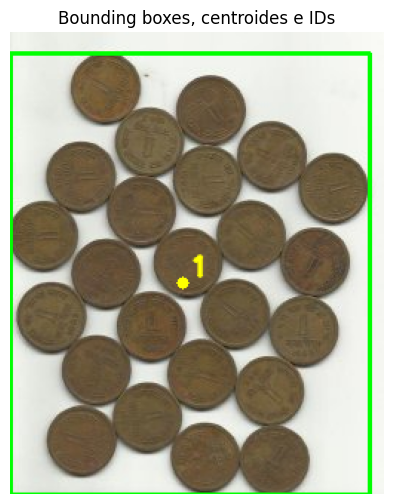

,ID,area,perimetro,x,y,w,h,cx,cy
0,1,47392.5,1585.775815,0,14,242,298,116.539308,169.55647


In [35]:
rows = []
vis_props = rgb.copy()
for i, cnt in enumerate(contours, start=1):
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    x,y,w,h = cv2.boundingRect(cnt)
    M = cv2.moments(cnt)
    if M['m00'] != 0:
        cx, cy = M['m10']/M['m00'], M['m01']/M['m00']
    else:
        cx, cy = float(x+w/2), float(y+h/2)

    rows.append(dict(ID=i, area=area, perimetro=perimeter, x=x, y=y, w=w, h=h, cx=cx, cy=cy))

    cv2.rectangle(vis_props, (x,y), (x+w,y+h), (0,255,0), 2)
    cv2.circle(vis_props, (int(cx), int(cy)), 4, (255,255,0), -1)
    cv2.putText(vis_props, str(i), (int(cx)+5, int(cy)-5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,0), 2, cv2.LINE_AA)

plt.figure(figsize=(6,6)); plt.imshow(vis_props); plt.title("Bounding boxes, centroides e IDs"); plt.axis("off"); plt.show()

df = pd.DataFrame(rows).sort_values("ID").reset_index(drop=True)
df

Ejemplo de jerarquía completa (`RETR_TREE`).

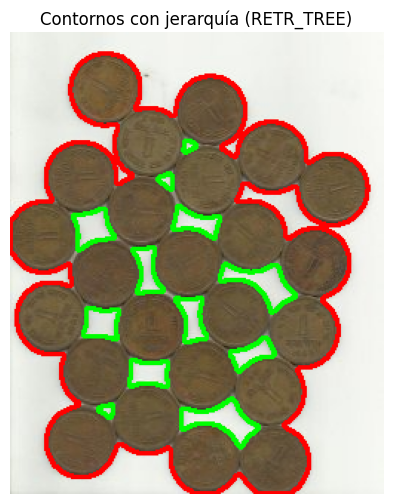

In [36]:
contours_all, hierarchy_all = cv2.findContours(bin_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
colors = [(255,0,0), (0,255,0), (0,0,255), (255,255,0)]
vis_tree = rgb.copy()
for idx, cnt in enumerate(contours_all):
    level = 0
    if hierarchy_all is not None:
        h = hierarchy_all[0][idx]
        parent = h[3]
        while parent != -1:
            level += 1
            parent = hierarchy_all[0][parent][3]
    color = colors[level % len(colors)]
    cv2.drawContours(vis_tree, contours_all, idx, color, 2)

plt.figure(figsize=(6,6)); plt.imshow(vis_tree); plt.title("Contornos con jerarquía (RETR_TREE)"); plt.axis("off"); plt.show()